In [7]:
# Importing modules
import numpy as np;
import matplotlib.pyplot as plot;

In [8]:
# Eulers methods
def EulerExplicit(df, y0, start, end, dx):
    x = np.arange(start, end + dx, dx);
    y = np.zeros(len(x));
    y[0] = y0;
    
    for i in range(0, len(x) - 1):
        y[i + 1] = y[i] + df(x[i], y[i]) * dx;

    return [x, y];

# Calculating error
def Error(f, eulerPoints): 
    xValues = eulerPoints[0];
    yValues = np.abs(eulerPoints[1] - f(xValues));
    
    return np.array([xValues, yValues]);

In [9]:
# Plot function
def Plot(function, explicit, error, title, xLabel, yLabel):
    plot.plot(function[0], function[1], label=f"Function {yLabel}", color='k');
    plot.xlabel(xLabel); plot.ylabel(yLabel);
    plot.title(title);
    
    plot.plot(explicit[0], explicit[1], color='c', label="Approximation", ls='--');
    plot.plot(error[0], error[1], color='r', label="Error");
    
    plot.legend();
    plot.grid();

    plot.show();

In [10]:
# Parameters 
lam, k, mu = 0.1, 100, 0.01; # Growth rate, carrying capacity and mortality rate, respectively.
N0 = 10; # Initial population 

start, end = 0, 100;
step = 0.01;

In [11]:
# Logistic growth model functions
def     N(t): return k / (1 + N0 * np.exp(-lam * t));
def dN(t, N): return lam * N * (1 - N / k);

In [12]:
# Logistic growth model functions (with mortality);
def     N_M(t): return k / (1 + (k / N0 - 1) * np.exp(-(lam - mu) * t));
def dN_M(t, N): return lam * N * (1 - N / k) - mu * N;

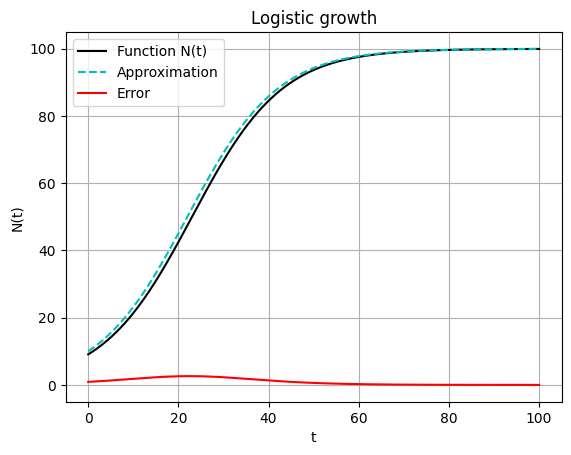

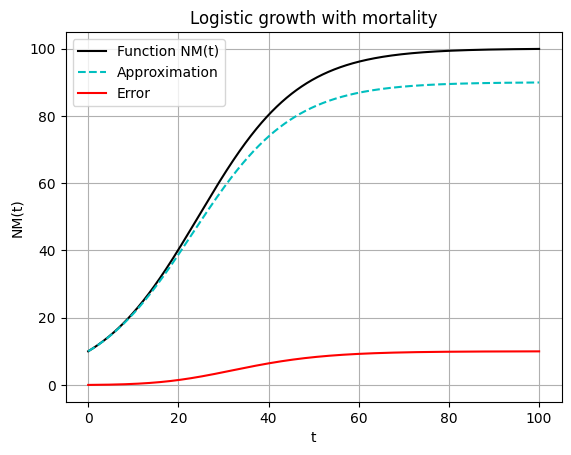

In [13]:
# Arranging analitic function to display
t = np.arange(start, end + step, step);
LGrowth  = np.array([t, N(t)]);
LGrowthM = np.array([t, N_M(t)]); 

# Approximating functions using euler method and calculating errors
LGrowthApprox  = EulerExplicit(dN, N0, start, end, step);
errLGrowth     = Error(N, LGrowthApprox); 

LGrowthMApprox = EulerExplicit(dN_M, N0, start, end, step);
errLGrowthM    = Error(N_M, LGrowthMApprox);

# Plotting logistic growths
Plot(LGrowth, LGrowthApprox, errLGrowth, "Logistic growth", "t", "N(t)"); 
Plot(LGrowthM, LGrowthMApprox, errLGrowthM, "Logistic growth with mortality", "t", "NM(t)");